In [1]:
%matplotlib inline
from sklearn import datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

<font size="4">Motivation Behind the MSE:</font>

<font size="4">$p_{w}(x_{i}) = \frac{1}{\sqrt{2\pi}\sigma}e^{-(\frac{(x-\mu)^{2}}{2\sigma^{2}})}$</font>

$ log \ p_{w}(x_{i})=-log(\sqrt{2\pi})-log(\sigma)-\frac{(x-\mu)^{2}}{2\sigma^{2}}$

$ \sum_{i=1}^{N}logp_{w}(x_{i})=-Nlog(\sqrt{2\pi})-Nlog(\sigma)-\frac{1}{2\sigma^{2}}\sum_{i=1}^{N}(x_{i}-\mu^{2})$

<font size="3">$argmax_{P_{w}} = argmax_{logP_{w}}=argmax_{\mu}-\sum_{i=1}^{N}(x_{i}-\mu_{i})^{2}=argmin_{\mu}\sum_{i=1}^{N}(x_{i}-\mu_{i})^{2}$</font>

In [2]:
class LinearRegression:
    
    def __init__(self,Data,target): 
        ones = np.ones(Data.shape)
        Data = np.append(ones,Data,axis=1)
        self.Data = Data
        self.target = target
        self.n = Data.shape[0]
        self.theta = np.ones(Data.shape[1])
        
    def MSE(self):
        '''Cost function for linear regression (Mean square error)'''
        h=np.dot(self.Data,self.theta)
        self.loss=(1/(2*self.n))*np.sum((h-self.target)**2)
        return self.loss
    
    def GradientDescent(self,num_of_iter,lr):
        '''Gradient descent for linear regression (MSE)'''
        for i in range(num_of_iter):
            #Gradient for MSE
            h = np.dot(self.Data,self.theta)
            self.theta = self.theta-(lr/self.n)*self.Data.T.dot(h-self.target)
        return self.theta
    
    def OLS(self,X,y):
        '''Ordinary least squares for linear regression'''
        ones = np.ones(X.shape)
        X = np.append(ones,X,axis=1)
        inv = np.linalg.inv(np.dot(self.Data.T,self.Data))
        self.w = np.dot(np.dot(inv,self.Data.T),self.target)
        #prediction
        y_pred = np.dot(X,self.w)
        return y_pred,np.sum(abs(y-y_pred))/self.n
                   
    def predict(self,X_test,y_test):
        ones=np.ones(X_test.shape)
        X_test=np.append(ones,X_test,axis=1)
        self.target_pred=np.dot(X_test,self.theta)
        self.error_mae=np.sum(abs(self.target_pred-y_test))/self.n
        return self.target_pred,self.error_mae
                
    def returnTheta(self):
        return self.theta

In [3]:
boston = datasets.load_boston()
colnames = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
boston_data = pd.DataFrame(data = boston.data, columns = colnames)
boston_target = pd.DataFrame(data = boston.target, columns = ["target"])
boston_df = pd.concat([boston_data[['RM']], boston_target], axis = 1)

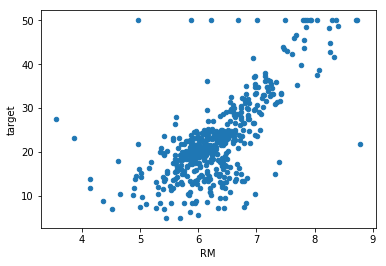

In [4]:
boston_df.plot.scatter(x='RM',y='target')
plt.show()

In [5]:
#training and testing size
train_size=int(0.65*boston_df.shape[0])
test_size=int(0.35*boston_df.shape[0])
print("Training set size : "+ str(train_size))
print("Testing set size : "+str(test_size))

Training set size : 328
Testing set size : 177


In [6]:
#shuffle the dataset
Data=boston_df.sample(frac=1)
X=Data.iloc[:,0:1].values
y=Data.iloc[:,1].values
#training set split
X_train=X[0:train_size,:]
Y_train=y[0:train_size]
X_test=X[train_size:,:]
Y_test=y[train_size:]

print('X_train shape =', X_train.shape)
print('Y_train shape =', Y_train.shape)
print('X_test shape =', X_test.shape)
print('Y_test shape =', Y_test.shape)

X_train shape = (328, 1)
Y_train shape = (328,)
X_test shape = (178, 1)
Y_test shape = (178,)


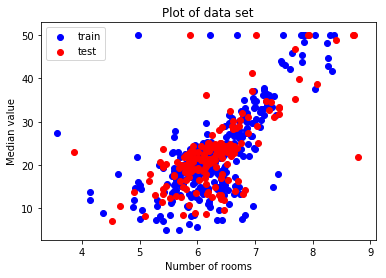

In [7]:
#scatter plot of training set
plt.scatter(X_train, Y_train, label='train', color='blue')
plt.scatter(X_test, Y_test, label='test', color='red')
plt.xlabel('Number of rooms')
plt.ylabel('Median value')
plt.title('Plot of data set')
plt.legend(loc="upper left")
plt.show()

In [8]:
#learning parameters
n_iter = 5000
learning_rate = 0.04

lr=LinearRegression(X_train,Y_train)
theta = lr.GradientDescent(n_iter,learning_rate)
grad_train_pred,error_for_train=lr.predict(X_train,Y_train)
grad_test_pred,error_for_test=lr.predict(X_test,Y_test)
print('Weights =', theta)
print('Mean absolute error for train =',error_for_train)
print('Mean absolute error for test =',error_for_test)

Weights = [-33.38217604   8.89775949]
Mean absolute error for train = 4.688480423630208
Mean absolute error for test = 2.187003577557496


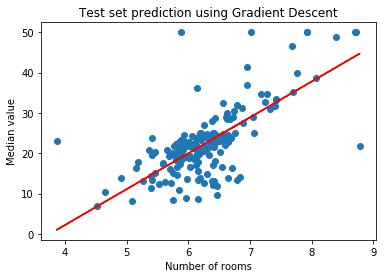

In [9]:
plt.scatter(X_test,Y_test)
plt.plot(X_test,grad_test_pred,'r')
#plt.plot([3,10],[theta[0]+3*theta[1],theta[0]+10*theta[1]])
plt.xlabel('Number of rooms')
plt.ylabel('Median value')
plt.title('Test set prediction using Gradient Descent')
plt.show()

In [10]:
#OLS
ols_train_pred, ols_train_error = lr.OLS(X_train,Y_train)
ols_test_pred, ols_test_error = lr.OLS(X_test,Y_test)

print('Mean absolute error for train =',ols_train_error)
print('Mean absolute error for test =',ols_test_error)

Mean absolute error for train = 4.654677895638213
Mean absolute error for test = 2.1975488713229296


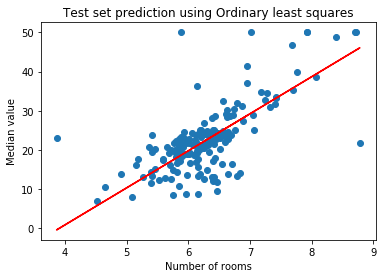

In [11]:
plt.scatter(X_test,Y_test)
plt.plot(X_test,ols_test_pred,'r')
plt.xlabel('Number of rooms')
plt.ylabel('Median value')
plt.title('Test set prediction using Ordinary least squares')
plt.show()